COVID-19 Vaccination Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Columns: 109 entries, Date to Bivalent_Booster_65Plus_Pop_Pct
dtypes: float64(44), int64(63), object(2)
memory usage: 2.0+ MB
None
         MMWR_week   Distributed  Distributed_Janssen  Distributed_Moderna  \
count  2368.000000  2.368000e+03         2.368000e+03         2.368000e+03   
mean     26.297297  2.932208e+07         9.976647e+05         1.046483e+07   
std      17.578056  1.151029e+08         3.899367e+06         4.097231e+07   
min       1.000000  4.709000e+04         6.000000e+02         2.470000e+04   
25%      10.000000  3.275430e+06         1.056000e+05         1.191250e+06   
50%      19.000000  8.646688e+06         2.804000e+05         3.250570e+06   
75%      43.000000  1.958942e+07         6.269000e+05         6.964305e+06   
max      52.000000  9.844443e+08         3.249690e+07         3.522477e+08   

       Distributed_Pfizer  Distributed_Novavax  Distributed_

<ipython-input-11-fb1a69410d79>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vaccinations['Distributed'].fillna(0, inplace=True)  # Replace with 0 or you can use vaccinations['Distributed'].fillna(vaccinations['Distributed'].mean(), inplace=True)
<ipython-input-11-fb1a69410d79>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

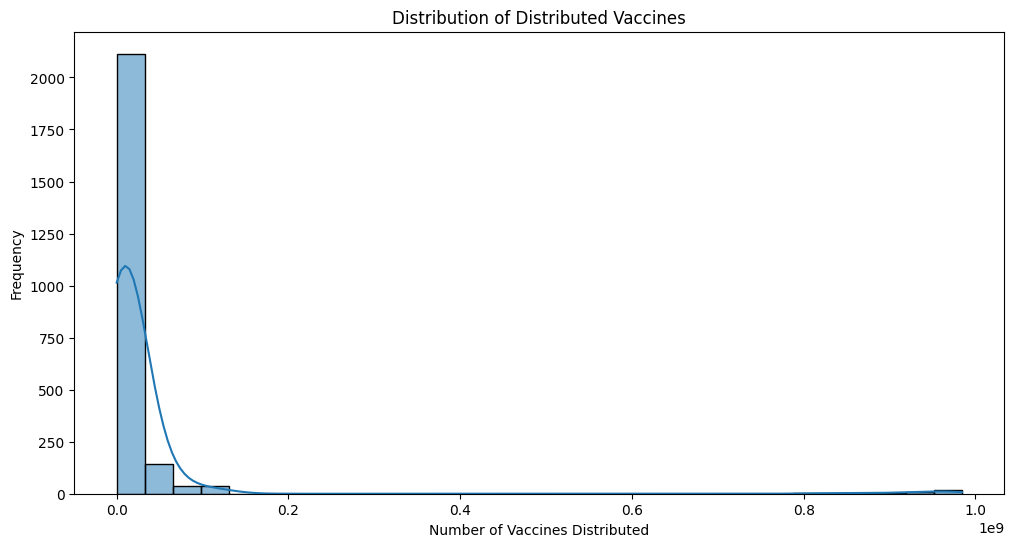

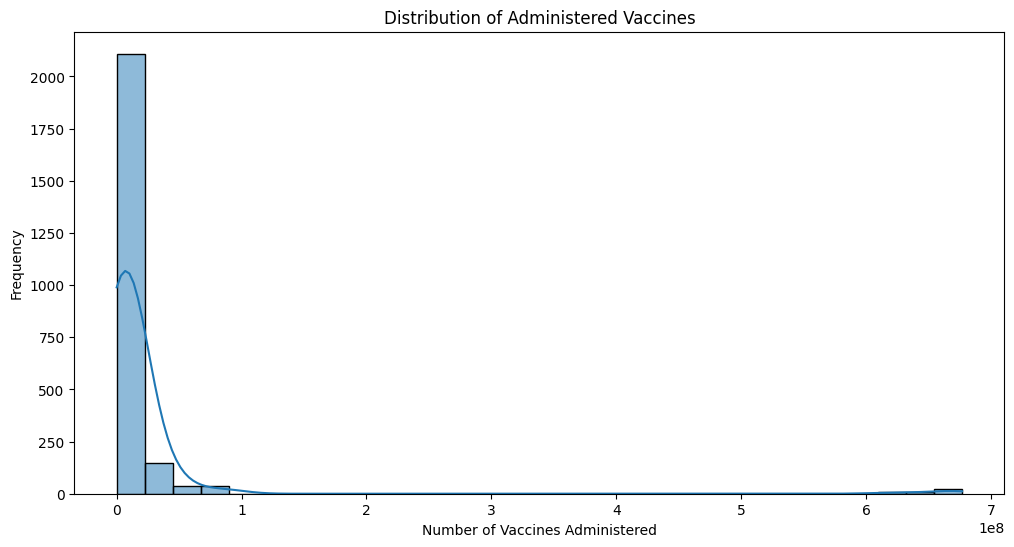

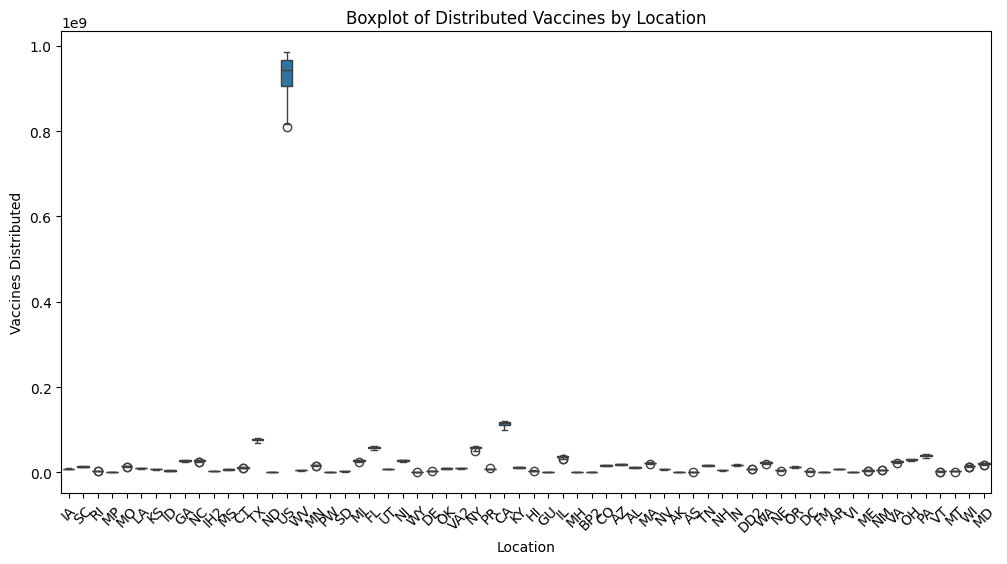

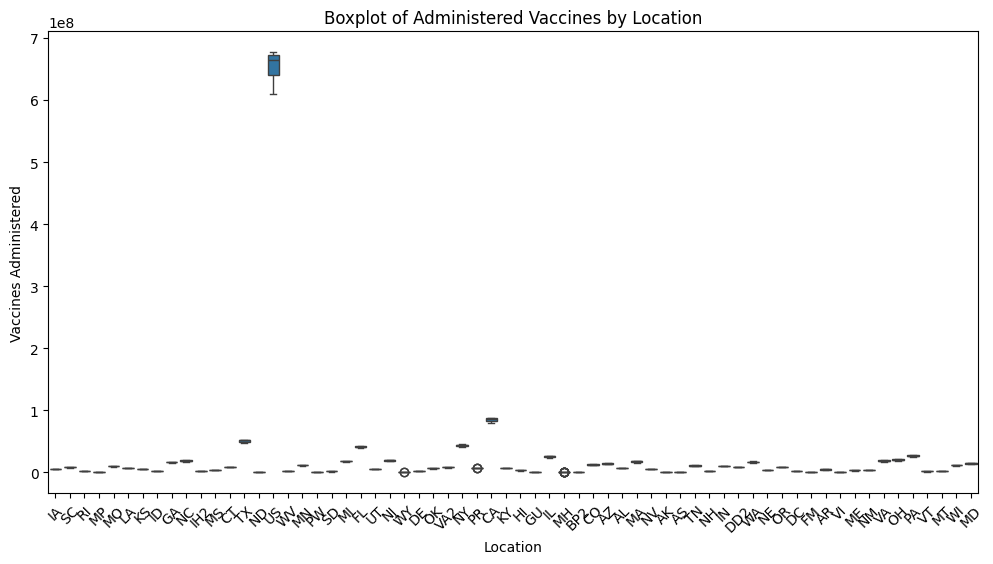

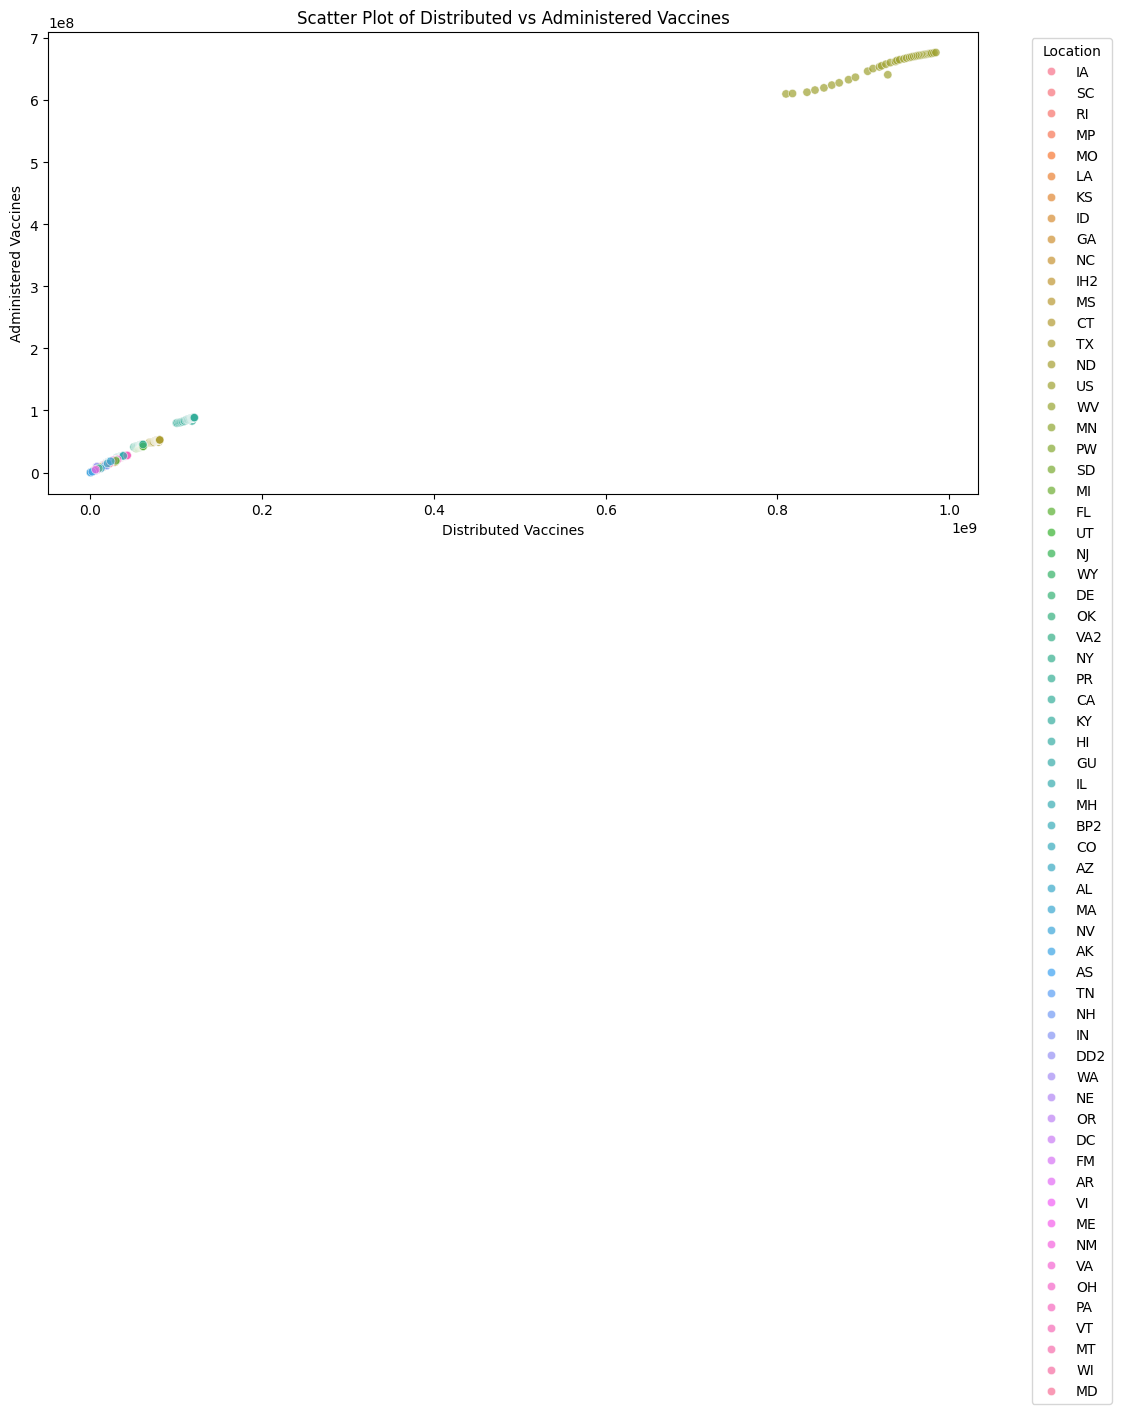

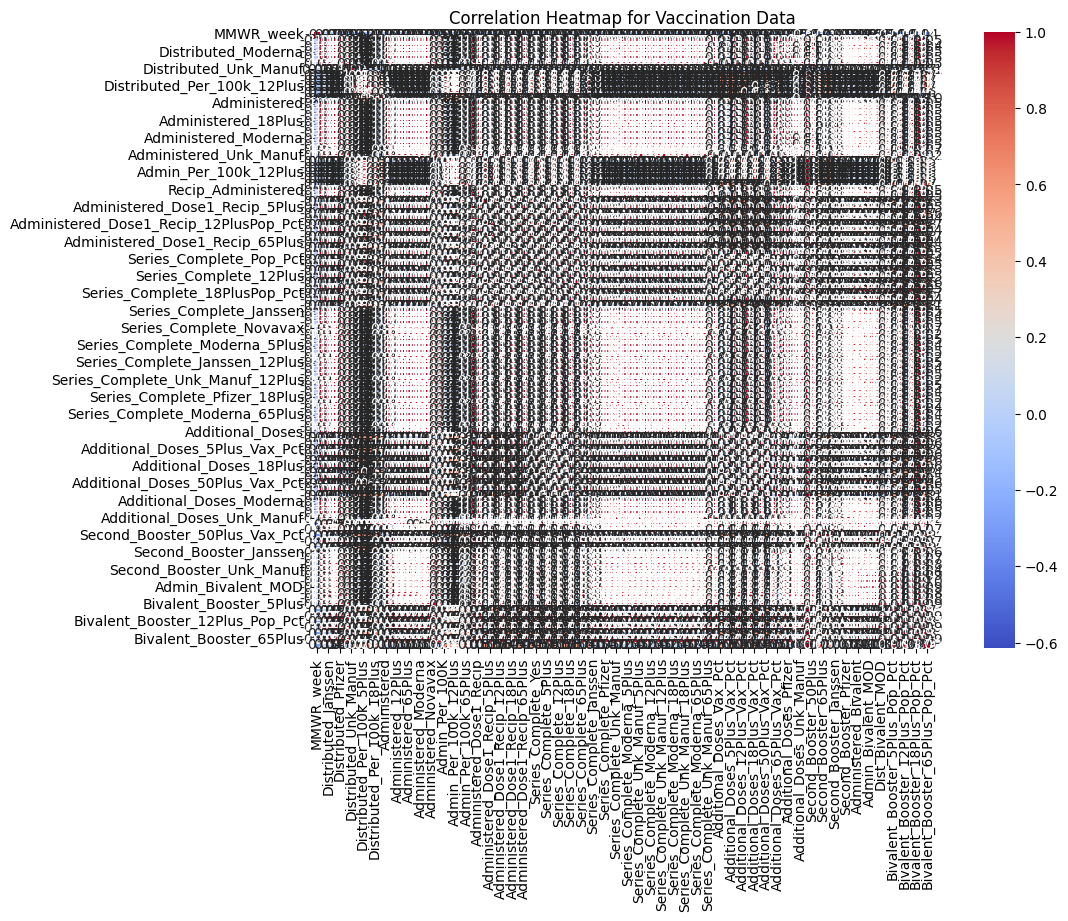


First two rows of the COVID-19 Vaccination Data:
         Date  MMWR_week Location  Distributed  Distributed_Janssen  \
0  08/31/2022         35       IA      7504855               292100   
1  08/31/2022         35       SC     11845275               461400   

   Distributed_Moderna  Distributed_Pfizer  Distributed_Novavax  \
0              2934120             4267035                11600   
1              4959240             6385535                39100   

   Distributed_Unk_Manuf  Dist_Per_100K  ...  Dist_Bivalent_PFR  \
0                      0         237867  ...                NaN   
1                      0         230063  ...                NaN   

   Dist_Bivalent_MOD  Bivalent_Booster_5Plus  Bivalent_Booster_5Plus_Pop_Pct  \
0                NaN                     NaN                             NaN   
1                NaN                     NaN                             NaN   

   Bivalent_Booster_12Plus  Bivalent_Booster_12Plus_Pop_Pct  \
0                      NaN  

<Figure size 640x480 with 0 Axes>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


vaccination_path = 'COVID-19_Vaccinations_in_the_United_States_Jurisdiction_20241030.csv'
vaccinations = pd.read_csv(vaccination_path)



print("COVID-19 Vaccination Data Info:")
print(vaccinations.info())
print(vaccinations.describe())


print("\nFirst two rows of the COVID-19 Vaccination Data:")
print(vaccinations.head(2))


print("\nData Types of Columns:")
print(vaccinations.dtypes)


print("\nNull Values in Each Column:")
print(vaccinations.isnull().sum())

vaccinations['Distributed'].fillna(0, inplace=True)
vaccinations['Administered'].fillna(0, inplace=True)

# Histograms for numerical features
plt.figure(figsize=(12, 6))
sns.histplot(vaccinations['Distributed'], bins=30, kde=True)
plt.title('Distribution of Distributed Vaccines')
plt.xlabel('Number of Vaccines Distributed')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(vaccinations['Administered'], bins=30, kde=True)
plt.title('Distribution of Administered Vaccines')
plt.xlabel('Number of Vaccines Administered')
plt.ylabel('Frequency')
plt.show()

# Boxplots for distributed vs administered vaccines
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Distributed', data=vaccinations)
plt.title('Boxplot of Distributed Vaccines by Location')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Vaccines Distributed')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Administered', data=vaccinations)
plt.title('Boxplot of Administered Vaccines by Location')
plt.xticks(rotation=45)
plt.xlabel('Location')
plt.ylabel('Vaccines Administered')
plt.show()

# Scatter plot for distributed and administered vaccines
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Distributed', y='Administered', data=vaccinations, hue='Location', alpha=0.7)
plt.title('Scatter Plot of Distributed vs Administered Vaccines')
plt.xlabel('Distributed Vaccines')
plt.ylabel('Administered Vaccines')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Select only numeric columns for correlation
numeric_columns = vaccinations.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = vaccinations[numeric_columns].corr()

# Correlation heatmap for numerical features
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap for Vaccination Data')
plt.show()
